In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,6,6,45,3,500,NaN
1,3/2/2019,59,55,1,6,500,NaN
2,3/3/2019,43,28,5,9,500,NaN
3,3/4/2019,27,3,4,16,500,NaN
4,3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...,...
1915,5/28/2024,64,32,48,9,500,NaN
1916,5/29/2024,47,20,23,8,500,NaN
1917,5/30/2024,40,6,49,9,500,NaN
1918,5/31/2024,12,18,14,8,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1920 non-null   object 
 1   pm25    1920 non-null   int64  
 2   pm10    1920 non-null   int64  
 3   o3      1920 non-null   int64  
 4   no2     1920 non-null   int64  
 5   so2     1920 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.0,0.0
mean,40.085938,23.563021,18.845833,9.697396,500.0,NaN
std,22.956887,13.469754,20.556540,7.802379,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,38.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,22.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,6
1,59
2,43
3,27
4,48
...,...
1915,64
1916,47
1917,40
1918,12


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)


<Axes: >

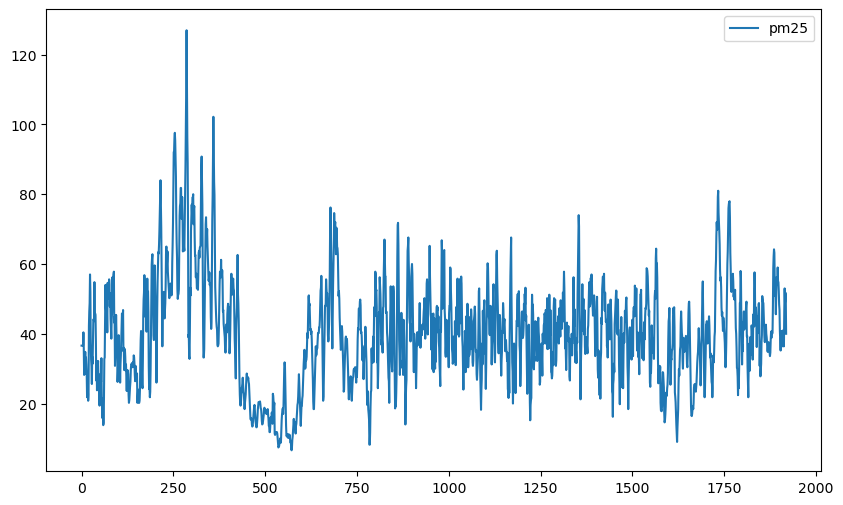

In [6]:
data.plot(figsize=(10,6))

In [7]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1728
Test data size: 192


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10954.219, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11001.554, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10949.819, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10952.587, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10999.561, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10950.877, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10950.505, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10952.492, Time=1.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10947.826, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=10948.884, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10948.511, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10950.594, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10950.499, Time=0.58 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.372 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [10]:
y_pred = pd.DataFrame(y_pred, columns=['pm25'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [11]:
# 4. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+91, step=1)

# Tạo mảng 90 ngày 
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# # In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[59.68134741 59.97581919 60.02739308 60.03642575 60.03800774 60.0382848
 60.03833333 60.03834183 60.03834332 60.03834358 60.03834362 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363 60.03834363
 60.0

In [12]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 18.503153166171934

Testing MAPE: 42.62039181615378

MAE: 16.460031029451855


In [13]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

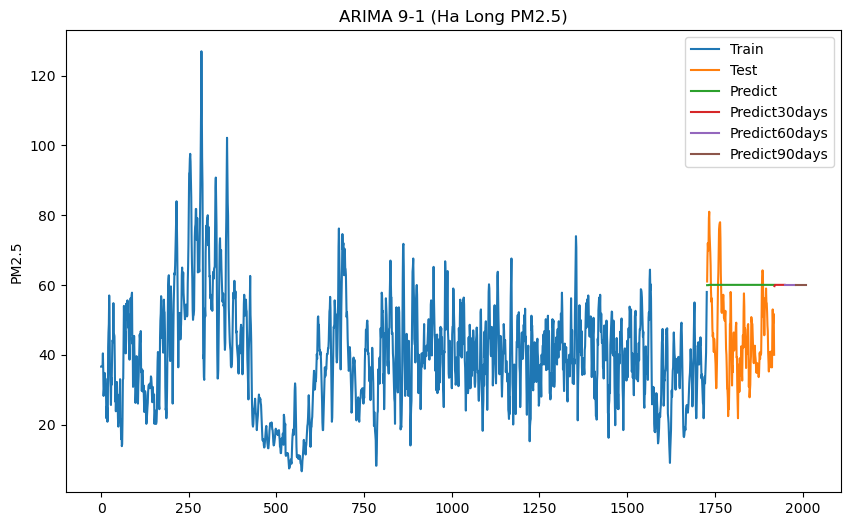

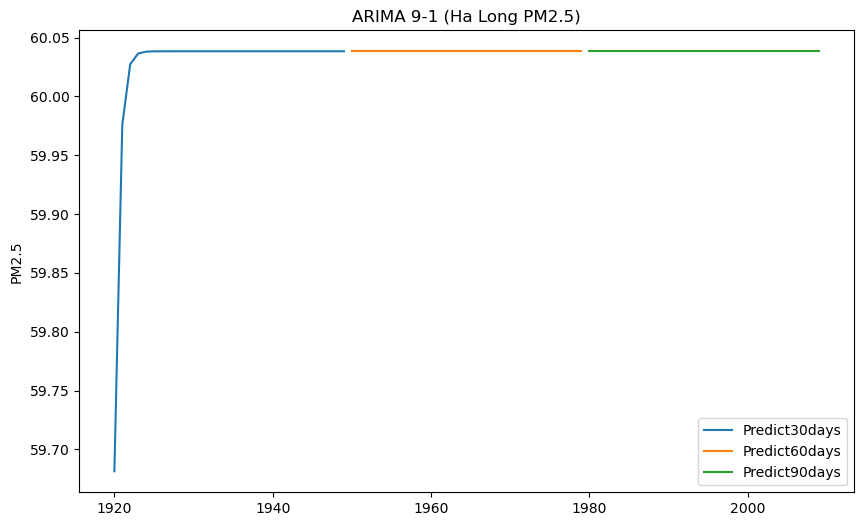

In [14]:
# 9.Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 9-1 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 9-1 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

